In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import SimpleITK as sitk

In [ ]:
print(os.getcwd())

In [2]:
train_adc_dir = '../data_dir/BONBID2023_Train/1ADC_ss'
train_zadc_dir = '../data_dir/BONBID2023_Train/2Z_ADC'
train_label_dir = '../data_dir/BONBID2023_Train/3Label'

val_adc_dir = '../data_dir/BONBID2023_Val/1ADC_ss'
val_zadc_dir = '../data_dir/BONBID2023_Val/2Z_ADC'

train_adc_files = sorted(os.listdir(train_adc_dir))
train_zadc_files = sorted(os.listdir(train_zadc_dir))
train_label_files = sorted(os.listdir(train_label_dir))

val_adc_files = sorted(os.listdir(val_adc_dir))
val_zadc_files = sorted(os.listdir(val_zadc_dir))

In [ ]:
print(len(train_adc_files), len(train_zadc_files))
print(len(val_adc_files), len(val_zadc_files))

<class 'SimpleITK.SimpleITK.Image'>
(16, 128, 128)
(128, 128)
(16, 128)
(16, 128)


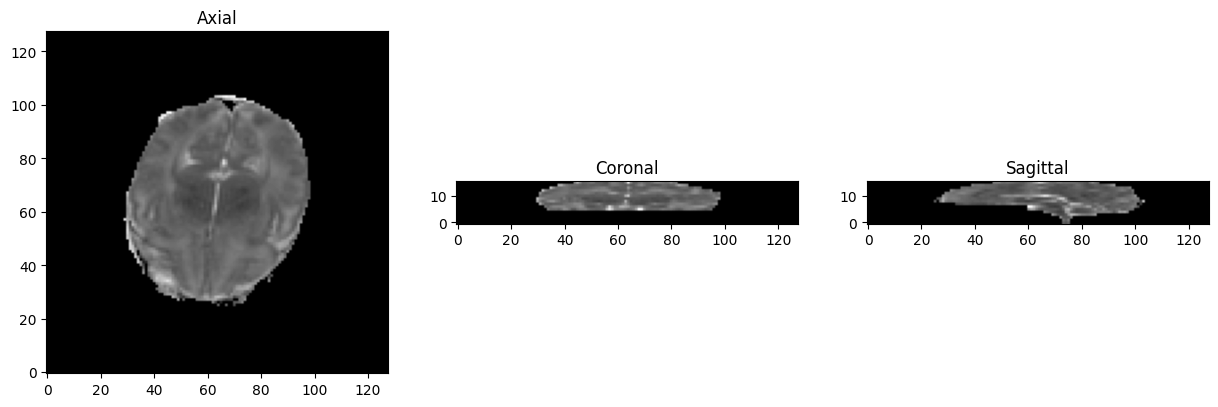

<class 'SimpleITK.SimpleITK.Image'>
(21, 128, 128)
(128, 128)
(21, 128)
(21, 128)


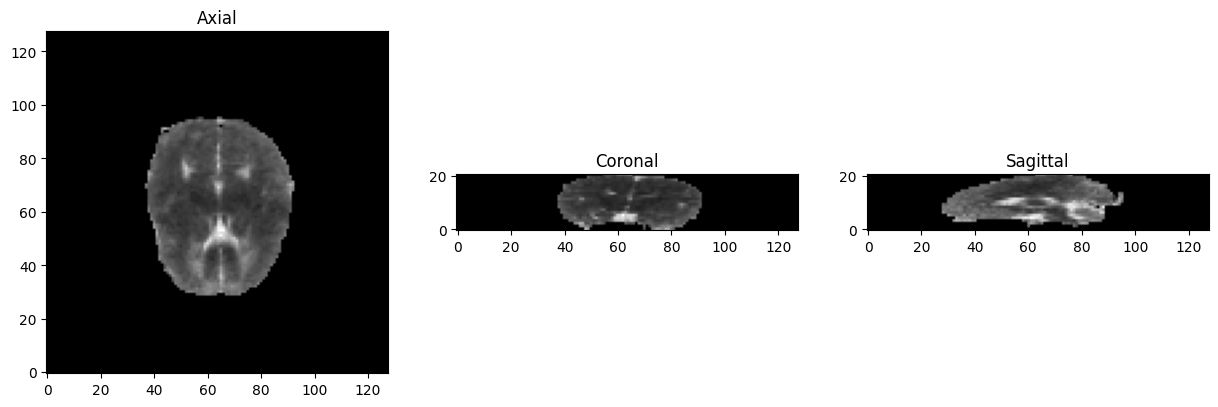

<class 'SimpleITK.SimpleITK.Image'>
(51, 128, 128)
(128, 128)
(51, 128)
(51, 128)


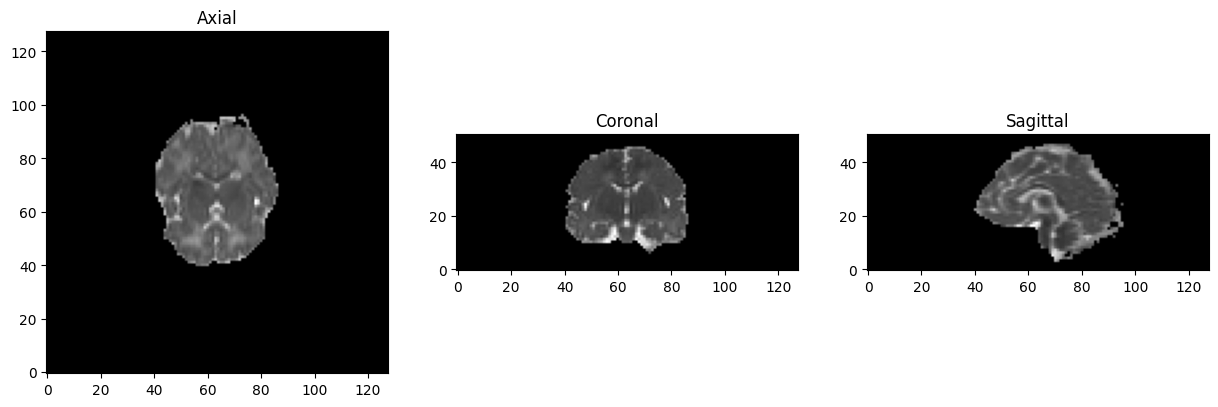

<class 'SimpleITK.SimpleITK.Image'>
(20, 144, 160)
(144, 160)
(20, 160)
(20, 144)


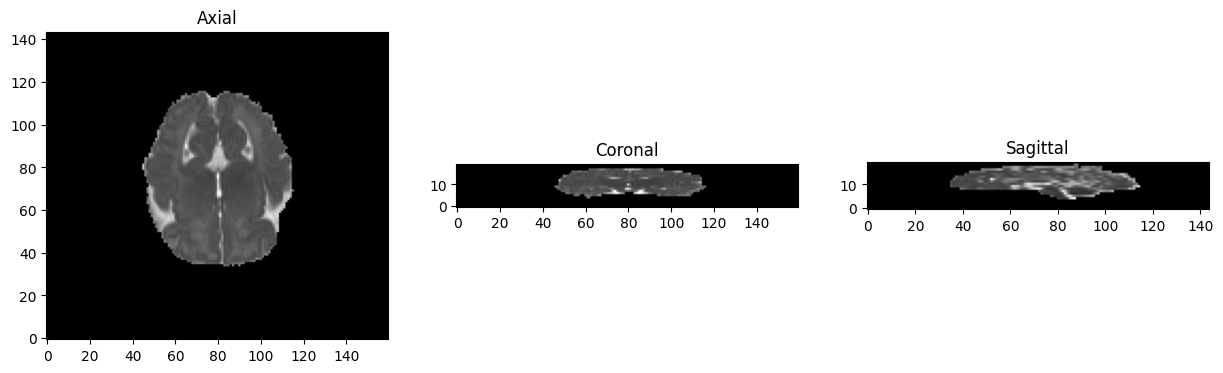

In [3]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

# Function to display images in a grid
def show_slices(slices, titles=None):
    fig, axes = plt.subplots(1, len(slices), figsize=(15, 5))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice, cmap="gray", origin="lower")
        if titles:
            axes[i].set_title(titles[i])
    plt.show()

# Read the .mha file
for file in val_adc_files:
    image = sitk.ReadImage(os.path.join(val_adc_dir, file))
    print(type(image))

    # Convert the SimpleITK image to a NumPy array
    image_array = sitk.GetArrayFromImage(image)
    print(image_array.shape)

    # Get axial, coronal, and sagittal slices
    axial_slice = image_array[image_array.shape[0] // 2, :, :]  # Middle axial slice
    print(axial_slice.shape)    
    coronal_slice = image_array[:, image_array.shape[1] // 2, :]  # Middle coronal slice
    print(coronal_slice.shape)
    sagittal_slice = image_array[:, :, image_array.shape[2] // 2]  # Middle sagittal slice
    print(sagittal_slice.shape)

    # Display the slices
    show_slices([axial_slice, coronal_slice, sagittal_slice],
                titles=["Axial", "Coronal", "Sagittal"])


(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)


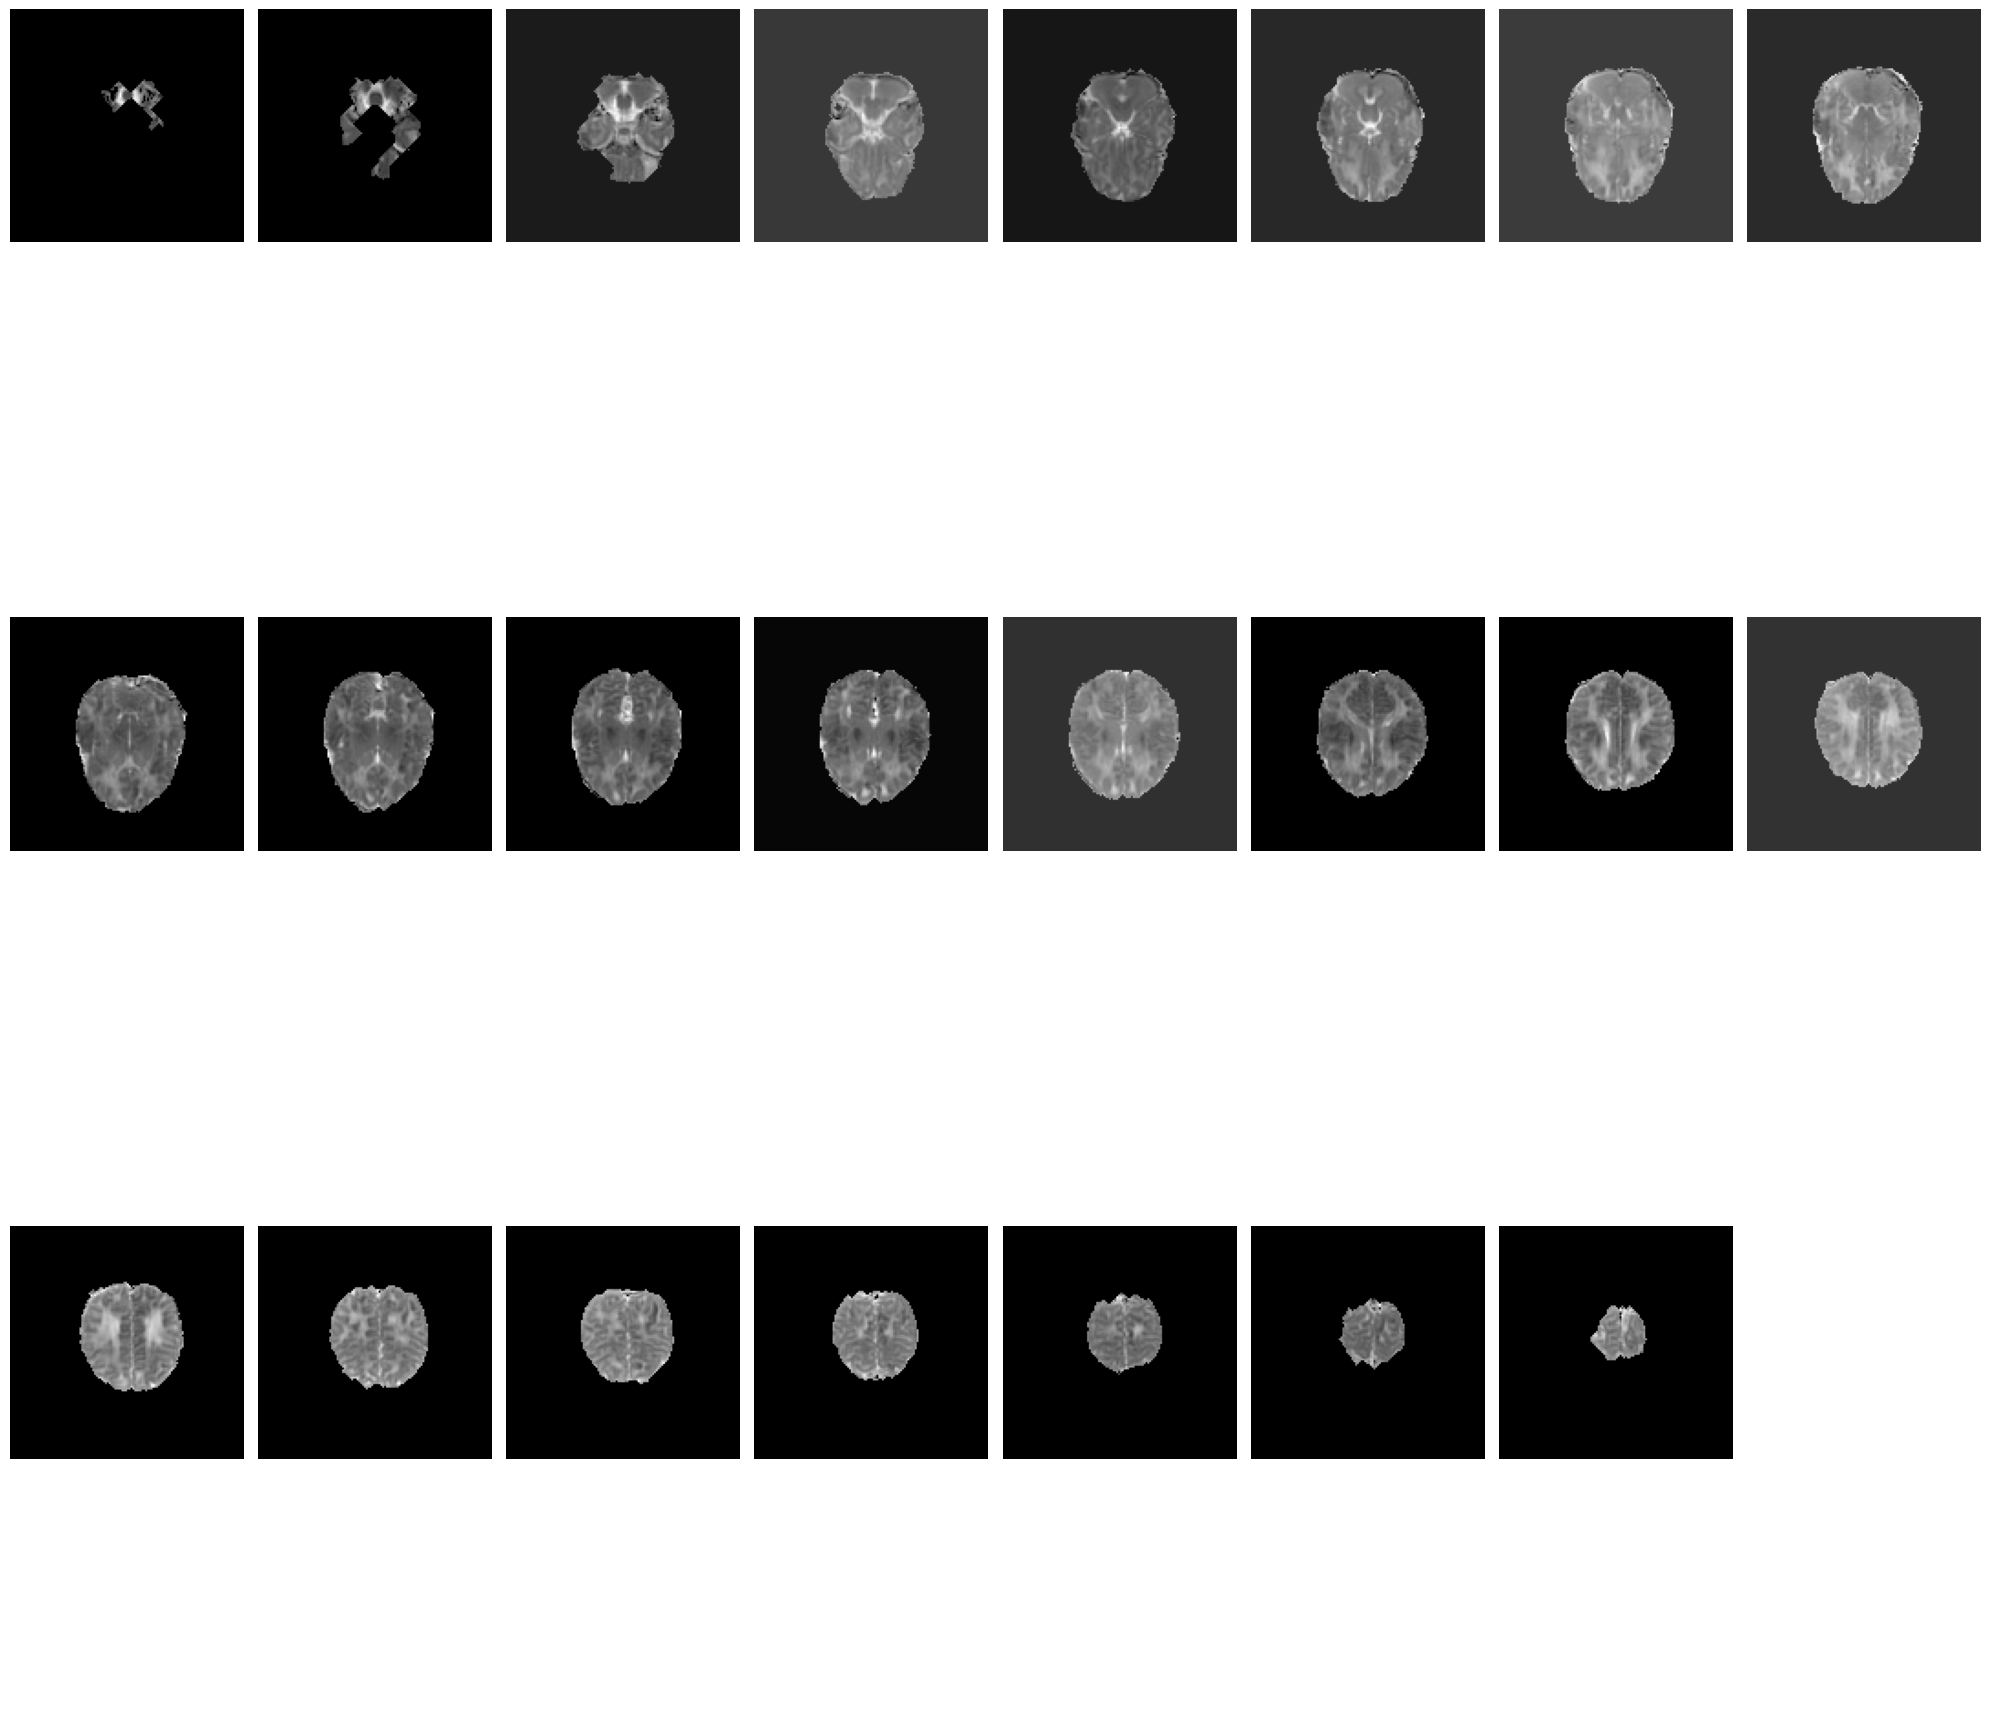

In [19]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

# Read the .mha file
filename = "your_file.mha"  # Replace with your .mha file path
image = sitk.ReadImage(os.path.join(train_adc_dir, train_adc_files[0]))
type(image)

# Convert the SimpleITK image to a NumPy array
image_array = sitk.GetArrayFromImage(image)

# Number of coronal slices
num_slices = image_array.shape[1]

# Define the grid size (adjust based on the number of slices)
cols = 8  # Number of columns in the grid
rows = num_slices // cols + (num_slices % cols > 0)  # Calculate rows required

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each coronal slice
for i in range(num_slices):
    coronal_slice = image_array[:, :, i]  # Extract coronal slice at index i
    print(coronal_slice.shape)
    axes[i].imshow(coronal_slice, cmap="gray", origin="lower")
    # axes[i].set_title(f"Slice {i}")
    axes[i].axis('off')  # Hide the axes

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.subplots_adjust(wspace=0, hspace=0)

# Display the figure
plt.tight_layout()
plt.show()


In [ ]:
first_sample = sitk.ReadImage(os.path.join(train_adc_dir, train_adc_files[0]))
size = first_sample.GetSize()
# for i in range(3):
print(first_sample[size[0]//2,:,:].GetSize())
print(first_sample[:,size[1]//2,:].GetSize())
print(first_sample[:,:,size[2]//2].GetSize())

In [ ]:
print(train_adc_files[0])
first_sample = sitk.ReadImage(os.path.join(train_adc_dir, train_adc_files[0]))
first_sample
print(first_sample.GetSize())
print(first_sample.GetSpacing())
print(first_sample.GetOrigin())
print(first_sample.GetDirection())
k = sitk.GetArrayFromImage(first_sample)
print(k.shape)
# print()
# print(k[1, :, :].shape)
for i in range(0,22):
    # print(k[i, :, :])
    plt.imshow(k[i, :, :],cmap='gray')
    plt.show()

# slices are [img_T1[size[0]//2,:,:], img_T1[:,size[1]//2,:], img_T1[:,:,size[2]//2]]
# show them for first sample

plt.imshow



In [14]:
shapes_adc = []

for file in train_adc_files:
    img = sitk.ReadImage(os.path.join(train_adc_dir, file))
    shapes_adc.append(img.GetSize())

# print(len(shapes))
# print(set(shapes))
# print(len(set(shapes)))

In [3]:
shapes = []

for file in val_adc_files:
    img = sitk.ReadImage(os.path.join(val_adc_dir, file))
    shapes.append(img.GetSize())

print(len(shapes))
print(set(shapes))
print(len(set(shapes)))

4
{(128, 128, 21), (128, 128, 16), (128, 128, 51), (160, 144, 20)}
4


In [15]:
shapes_zadc = []

for file in train_zadc_files:
    img = sitk.ReadImage(os.path.join(train_zadc_dir, file))
    shapes_zadc.append(img.GetSize())

# print(len(shapes))
# print(set(shapes))
# print(len(set(shapes)))

print(shapes_adc == shapes_zadc)

True


In [ ]:
shapes = []

for file in val_zadc_files:
    img = sitk.ReadImage(os.path.join(val_zadc_dir, file))
    shapes.append(img.GetSize())

print(len(shapes))
print(set(shapes))
print(len(set(shapes)))